In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/embedded-monthly-data/embedded.csv


In [84]:
#python libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import gzip

#Sklearn libraries
from sklearn.cluster import KMeans
from sklearn.metrics import  normalized_mutual_info_score, adjusted_rand_score, silhouette_score
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

#neural networks libraries
from tensorflow import keras
import tensorflow as tf 
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense, Input, Layer, InputSpec
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import VarianceScaling

In [85]:
df=pd.read_csv('../input/embedded-monthly-data/embedded.csv')

In [86]:
df.head()

,Unnamed: 0,latitude,longitude,month,wday,precipitation,relative_humidity,specific_humidity,temp,wind_res,embedding_1,embedding_2,embedding_3
0,0,-1.188850,36.931382,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
1,1,-0.662939,37.208730,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
2,2,-0.662939,37.208730,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
3,3,-1.288087,36.826583,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
4,4,-1.188850,36.931382,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763


In [87]:
df = df.drop(['Unnamed: 0','month','wday','specific_humidity'],axis=1)
df.head()

,latitude,longitude,precipitation,relative_humidity,temp,wind_res,embedding_1,embedding_2,embedding_3
0,-1.188850,36.931382,24.1,72.700005,15.161493,0.933993,-0.040647,-0.277487,-0.027763
1,-0.662939,37.208730,24.1,72.700005,15.161493,0.933993,-0.040647,-0.277487,-0.027763
2,-0.662939,37.208730,24.1,72.700005,15.161493,0.933993,-0.040647,-0.277487,-0.027763
3,-1.288087,36.826583,24.1,72.700005,15.161493,0.933993,-0.040647,-0.277487,-0.027763
4,-1.188850,36.931382,24.1,72.700005,15.161493,0.933993,-0.040647,-0.277487,-0.027763


In [88]:
# df = df.drop(['weekend','wind_v','wind_u'],axis=1)

In [89]:
# df = df.drop(['year'],axis=1)

In [90]:
df.shape

(6287, 9)

In [91]:
df=df.dropna()

In [92]:
df.isnull().sum()

latitude             0
longitude            0
precipitation        0
relative_humidity    0
temp                 0
wind_res             0
embedding_1          0
embedding_2          0
embedding_3          0
dtype: int64

In [93]:
X=df

In [94]:
columns = list(X.columns.values)
scaler = MinMaxScaler() 
X[columns] = scaler.fit_transform(X[columns])
X.head()

,latitude,longitude,precipitation,relative_humidity,temp,wind_res,embedding_1,embedding_2,embedding_3
0,0.749075,0.387246,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036
1,0.960744,0.566493,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036
2,0.960744,0.566493,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036
3,0.709134,0.319515,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036
4,0.749075,0.387246,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036


In [95]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
y_pred_kmeans = kmeans.fit_predict(X)

In [96]:
def cluster_accuracy(y_pred,y_true):
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
  # Confusion matrix
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
        ind = linear_assignment(-w)
        acc = sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size
    return acc

In [97]:
score = silhouette_score(X, y_pred_kmeans, metric='euclidean')
print ("For n_clusters = {}, K_means silhouette score is {})".format(n_clusters, score))


For n_clusters = 5, K_means silhouette score is 0.3416824237680451)


In [98]:
GMM = GaussianMixture(n_components=4, random_state=42)
y_pred_b2 = GMM.fit_predict(X)

In [99]:
score = silhouette_score(X, y_pred_b2, metric='euclidean')
print ("For n_clusters = {}, GMM silhouette score is {})".format(n_clusters, score))


For n_clusters = 5, GMM silhouette score is 0.34891082415699076)


In [100]:
aggcl = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
y_pred_b3 = aggcl.fit_predict(X)


In [101]:
score = silhouette_score(X, y_pred_b3, metric='euclidean')
print ("For n_clusters = {}, Agglomerative Clustering silhouette score is {})".format(n_clusters, score))


For n_clusters = 5, Agglomerative Clustering silhouette score is 0.2804901488652074)


# Autoencoder Model 

In [102]:
def auto_encoder(dims, init):
    stack_layers = len(dims) - 1
    
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers of encoder
    for i in range(stack_layers-1):
        x = Dense(dims[i + 1], activation='relu',  kernel_initializer=init, name='encoder_%d' % i)(x)

    # latent hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (stack_layers - 1))(x)
    x = encoded

    # internal layers of decoder
    for i in range(stack_layers-1, 0, -1):
        x = Dense(dims[i], activation='relu', kernel_initializer=init, name='decoder_%d' % i)(x)

    # decoder output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    
    decoded = x
    
    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model = Model(inputs=input_data, outputs=encoded, name='encoder')
    
    return autoencoder_model, encoder_model

In [103]:
#No of Clusters
n_clusters = 5
#dimensions
dims = [X.shape[-1], 500, 500, 2000, 10]
#Pre_trained Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#initialization
init =  tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)

In [104]:
autoencoder, encoder = auto_encoder(dims, init=init)

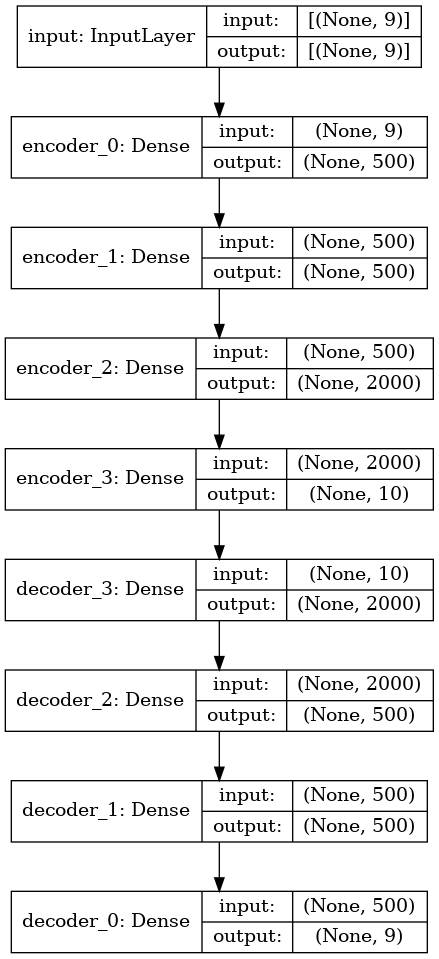

In [105]:
plot_model(autoencoder,show_shapes=True)

In [106]:
path = './'

In [107]:
autoencoder.compile(optimizer=optimizer, loss='mse')
#call_back = keras.callbacks.EarlyStopping(monitor='loss',patience=5) 
history = autoencoder.fit(X, X,validation_split=0.20, batch_size=128, epochs=100,verbose=1)
autoencoder.save_weights(path + '/ae_weights_dimred_10d.h5')

Epoch 1/100
40/40 [==============================] - 2s 38ms/step - loss: 0.3571 - val_loss: 0.2819
Epoch 2/100
40/40 [==============================] - 1s 35ms/step - loss: 0.1651 - val_loss: 0.0569
Epoch 3/100
40/40 [==============================] - 1s 34ms/step - loss: 0.0394 - val_loss: 0.0578
Epoch 4/100
40/40 [==============================] - 1s 33ms/step - loss: 0.0375 - val_loss: 0.0574
Epoch 5/100
40/40 [==============================] - 1s 33ms/step - loss: 0.0367 - val_loss: 0.0570
Epoch 6/100
40/40 [==============================] - 1s 33ms/step - loss: 0.0360 - val_loss: 0.0574
Epoch 7/100
40/40 [==============================] - 1s 33ms/step - loss: 0.0357 - val_loss: 0.0568
Epoch 8/100
40/40 [==============================] - 1s 36ms/step - loss: 0.0355 - val_loss: 0.0560
Epoch 9/100
40/40 [==============================] - 1s 35ms/step - loss: 0.0354 - val_loss: 0.0564
Epoch 10/100
40/40 [==============================] - 1s 34ms/step - loss: 0.0354 - val_loss: 0.0562

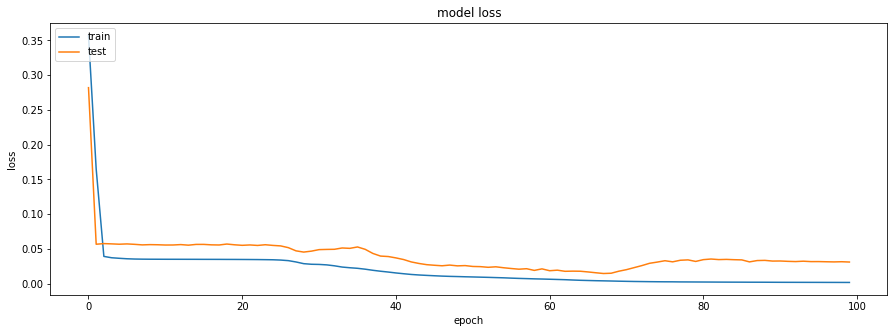

In [108]:
# summarize history for loss
fig = plt.figure(figsize = (15, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [109]:
embedded_data = encoder.predict(X)

In [110]:
embedded_data.shape

(6287, 10)

In [111]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
y_pred1 = kmeans.fit_predict(embedded_data)

In [112]:
score = silhouette_score(X, y_pred1, metric='euclidean')
print ("For n_clusters = {}, K_means silhouette score is {})".format(n_clusters, score))


For n_clusters = 5, K_means silhouette score is 0.27745926813695054)


In [113]:
y_pred1

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [114]:
data_all = df.copy()
data_all['cluster'] = y_pred1
data_all.head()

,latitude,longitude,precipitation,relative_humidity,temp,wind_res,embedding_1,embedding_2,embedding_3,cluster
0,0.749075,0.387246,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036,1
1,0.960744,0.566493,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036,1
2,0.960744,0.566493,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036,1
3,0.709134,0.319515,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036,1
4,0.749075,0.387246,0.573276,0.569356,0.417149,0.136897,0.679055,0.350506,0.490036,1


In [115]:
lis = data_all['cluster'].value_counts()
lis

3    1772
2    1329
0    1233
1    1093
4     860
Name: cluster, dtype: int64

In [116]:
def reverse_minmax(X_scaled, min, max):
    X_original =  X_scaled * (max - min) + min
    return X_original

In [117]:
df=pd.read_csv('../input/embedded-monthly-data/embedded.csv')

In [118]:
latmin = min(df['latitude'])
latmax = max(df['latitude'])
lonmin = min(df['longitude'])
lonmax = max(df['longitude'])


In [119]:
lat = []
lon = []
for i in range(5):
    data1 = data_all.loc[data_all['cluster'] == 0]
    lati = data1['latitude'].sum()/lis[i]
    longi = data1['longitude'].sum()/lis[i]
    lat.append(reverse_minmax(lati,latmin,latmax))
    lon.append(reverse_minmax(longi,lonmin,lonmax))
print(lat)
print(lon)

[-1.2809199215560405, -1.0543222900065223, -1.4087090018700672, -1.819031751940888, -0.5136328633434859]
[36.85478700559167, 36.921723836566336, 36.81703817295429, 36.69582903065772, 37.08144323219658]


In [120]:
resdf = pd.DataFrame()
resdf['lat'] = lat
resdf['lon'] = lon
resdf.head()

,lat,lon
0,-1.280920,36.854787
1,-1.054322,36.921724
2,-1.408709,36.817038
3,-1.819032,36.695829
4,-0.513633,37.081443


# Scoring Function

In [121]:
# scoring function
def Average(lst):
    return sum(lst) / len(lst)

In [122]:
def score(sub, ref):
    total_distance = 0
    for c_lat, c_lon in ref[['latitude', 'longitude']].values: #For each accident period in the test set
        dists = []
        mindist=0
        for a in range(5):
            dist = (((c_lat - sub['lat'][a])**2)+((c_lon - sub['lon'][a])**2))**0.5
            dists.append(dist)  #the closest ambulance is addeed to the overall distance
    return Average(dists)

In [123]:
ref = df
ref.head()

,Unnamed: 0,latitude,longitude,month,wday,precipitation,relative_humidity,specific_humidity,temp,wind_res,embedding_1,embedding_2,embedding_3
0,0,-1.188850,36.931382,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
1,1,-0.662939,37.208730,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
2,2,-0.662939,37.208730,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
3,3,-1.288087,36.826583,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763
4,4,-1.188850,36.931382,0,1,24.1,72.700005,0.00956,15.161493,0.933993,-0.040647,-0.277487,-0.027763


In [124]:
score(resdf,ref)

0.39309293087543234

In [125]:
x_embedded = TSNE(n_components=2).fit_transform(X)
x_embedded.shape

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(6287, 2)

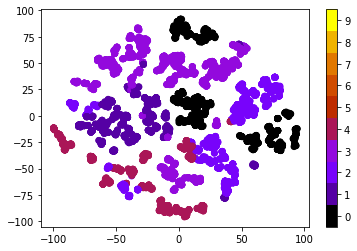

In [126]:
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]
plt.scatter(vis_x, vis_y, c=y_pred1, cmap=plt.cm.get_cmap("gnuplot", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()